# **Heart Disease** - Classification Problem

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing dataset
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
# Lets take a look at our dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Atributes:

* age - age in years 
* sex - (1 = male; 0 = female) 
* cp - chest pain type 
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
* chol - serum cholestoral in mg/dl 
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg - resting electrocardiographic results 
* thalach - maximum heart rate achieved 
* exang - exercise induced angina (1 = yes; 0 = no) 
* oldpeak - ST depression induced by exercise relative to rest 
* slope - the slope of the peak exercise ST segment 
* ca - number of major vessels (0-3) colored by flourosopy 
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
* target - have disease or not (1=yes, 0=no)

In [4]:
# checking datatypes of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Statistical data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
print("Chest Pain types:",df.cp.unique())

Chest Pain types: [3 2 1 0]


In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

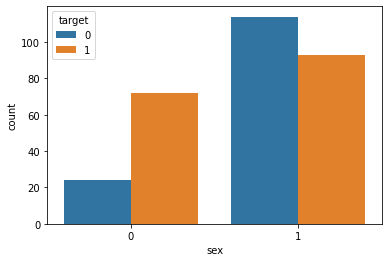

In [9]:
sns.countplot(df["sex"], hue="target", data=df)
plt.show()

In [10]:
df.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


# Data Visualization

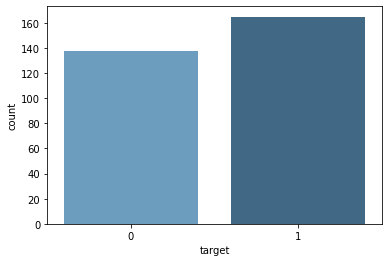

In [11]:
sns.countplot(df.target, palette=("Blues_d"))
plt.show()

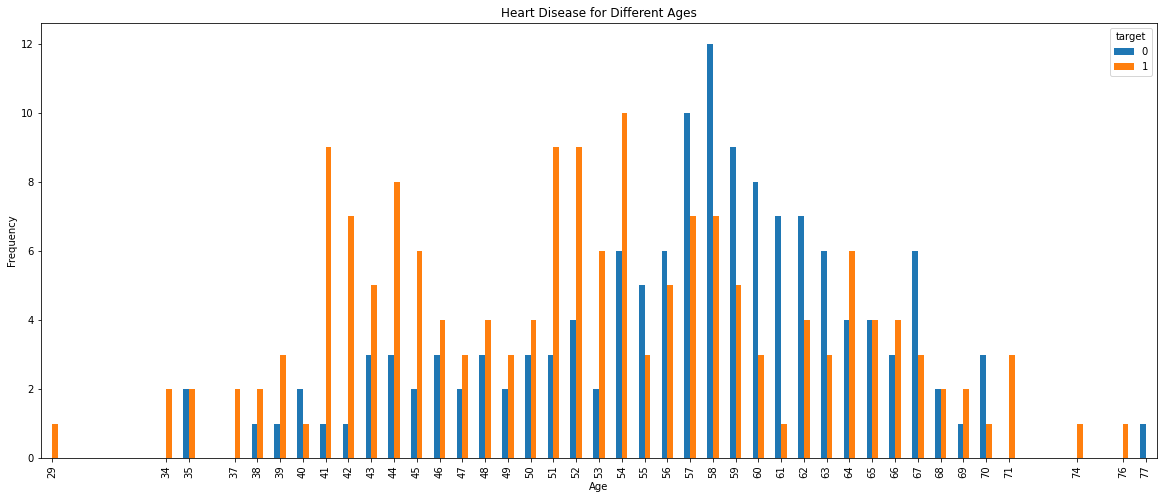

In [12]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,8))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Heart Disease for Different Ages")
plt.show()

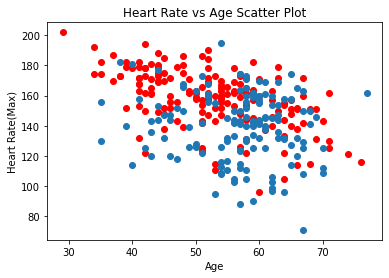

In [13]:
plt.scatter(df.age[df.target==1],y= df.thalach[df.target==1], c="red")
plt.scatter(df.age[df.target==0], y=df.thalach[df.target==0])
plt.ylabel("Heart Rate(Max)")
plt.xlabel("Age")
plt.title("Heart Rate vs Age Scatter Plot")
plt.show()

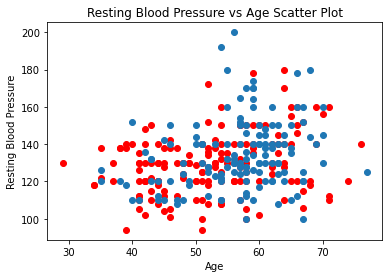

In [14]:
plt.scatter(df.age[df.target==1],y = df.trestbps[df.target==1],c="red")
plt.scatter(df.age[df.target==0], y=df.trestbps[df.target==0])
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.title("Resting Blood Pressure vs Age Scatter Plot")
plt.show()

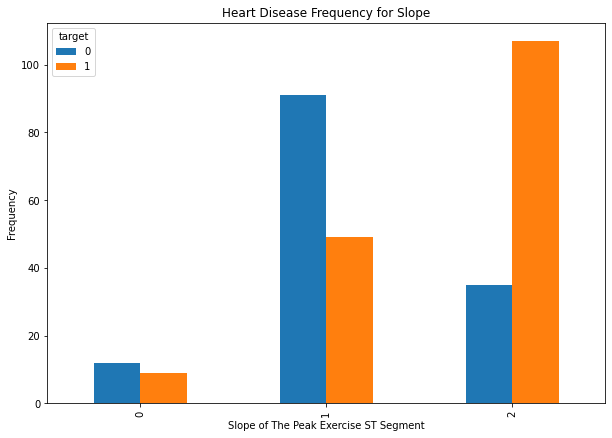

In [15]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(10,7))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('Slope of The Peak Exercise ST Segment')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [18]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [19]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [20]:
y = df.target.values
X = df.drop(columns="target")

In [21]:
#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 21)
(242,)
(61, 21)
(61,)


In [23]:
# Normalizing Data
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Selection

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report , accuracy_score
report = classification_report(y_test,y_pred)
print(report)
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.45      0.60        29
           1       0.66      0.97      0.78        32

    accuracy                           0.72        61
   macro avg       0.79      0.71      0.69        61
weighted avg       0.79      0.72      0.70        61

0.7213114754098361


In [25]:
df1 = pd.DataFrame(y_test,y_pred)
df1.head(10)

,0
0,0
1,0
1,1
0,0
1,1
0,0
1,1
0,0
1,1
0,0


### Support Vector Machine Classifier

In [26]:
from sklearn.svm import SVC
model2 = SVC(verbose=True)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
report_svc = classification_report(y_test,y_pred2)
print(report_svc)
print(accuracy_score(y_test,y_pred2))

[LibSVM]              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.71      0.91      0.79        32

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.74        61
weighted avg       0.78      0.75      0.75        61

0.7540983606557377


### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion="entropy",max_depth=200)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
report_dtree = classification_report(y_pred3,y_test)
print(report_dtree)
print(accuracy_score(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        29
           1       0.75      0.75      0.75        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

0.7377049180327869


In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
report_nb = classification_report(y_pred_nb,y_test)
print(report_nb)
acc = nb.score(X_test,y_test)*100
print("Accuracy of Naive Bayes:",acc)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy of Naive Bayes: 86.88524590163934


### Random Forest Classifier

In [29]:
model_rf = RandomForestClassifier(n_estimators=1000, random_state=1)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
report_rf2 = classification_report(y_test,y_pred_rf)
print(report_rf2)
print(accuracy_score(y_pred_rf,y_test))

NameError: name 'RandomForestClassifier' is not defined

In [30]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred)
cm_svc = confusion_matrix(y_test,y_pred2)
cm_dtree = confusion_matrix(y_test,y_pred3)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_nb = confusion_matrix(y_test,y_pred_nb)

NameError: name 'y_pred_rf' is not defined

In [31]:
# Confusion Matrixes

# Confusion Matrixes

NameError: name 'cm_nb' is not defined

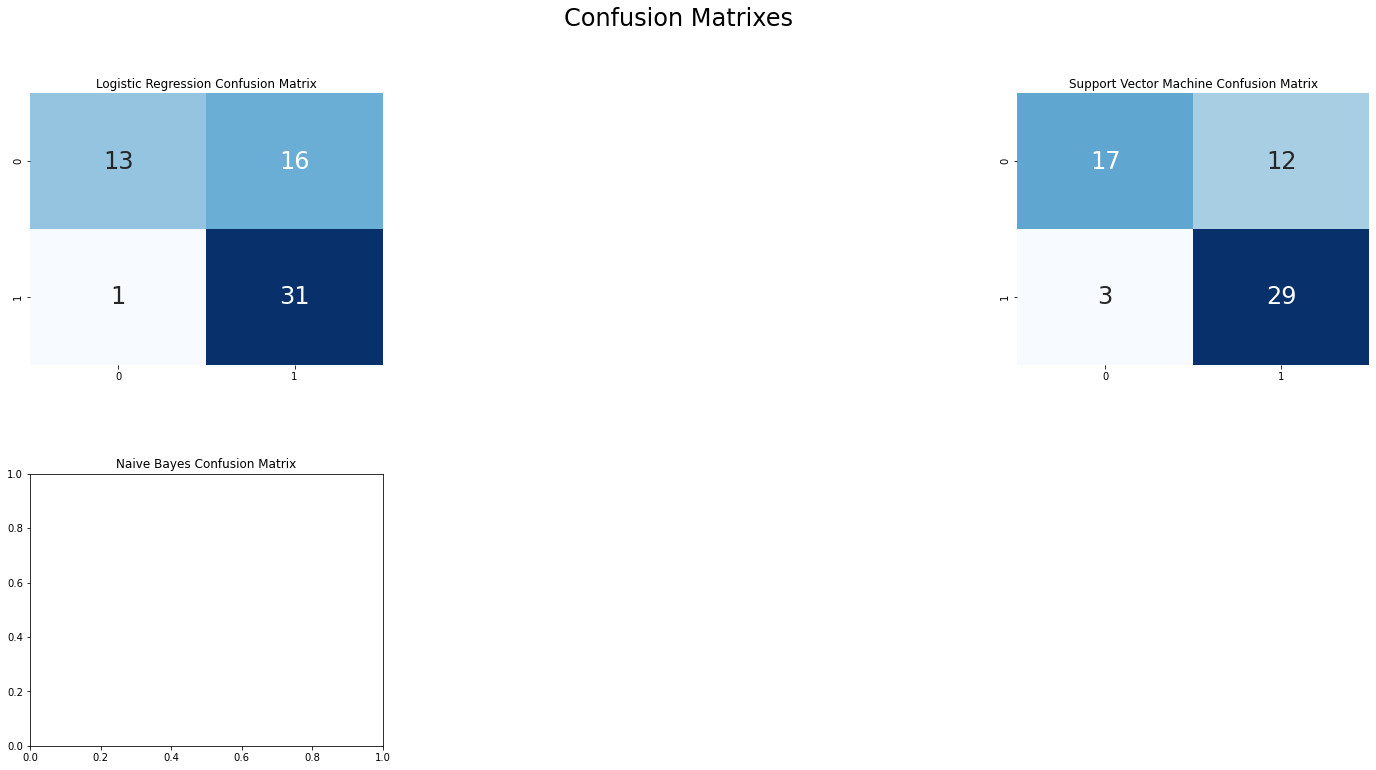

In [32]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtree,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()